In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import pickle

def mahalanobis_dist(vals, cov, real_vals):
    dif = (vals - real_vals)
    return np.sqrt(np.linalg.multi_dot([dif, np.linalg.inv(cov), dif]))

def confidence_ellipse(val, cov, ax, n_std=1.0, facecolor='none', **kwargs):
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = val[0]

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = val[1]

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)


In [12]:
path = '/home/tguethle/Documents/spi/Master_Thesis/main_files/spimodfit_comparison_sim_source/'
real_vals = [7e-4, -2]
piv = 100

In [13]:
folders = [
    f"{path}/pyspi_real_bkg_para2/0374/pre_ppc",
    f"{path}/pyspi_real_bkg_Timm2_para2/0374/pre_ppc",
    f"{path}/pyspi_real_bkg_Timm2_para2/0374/pre_ppc_no_rebinning",
    f"{path}/spimodfit_fits/0374_real_bkg_Timm2_para2",
    f"{path}/pyspi_real_bkg_Timm2_para2/0374/pre_ppc_no_rebinning_low_energy",

]

d_M = []
for i in range(len(folders)):
    with open(f"{folders[i]}/source_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    d_M.append(mahalanobis_dist(val, cov, real_vals))

names = [
    "PySpi Real Bkg afs Daten",
    "PySpi Real Bkg spiselect Daten",
    "PySpi Real Bkg spiselect Daten (no rebinning)",
    "Spimodfit Real Bkg Timm2",
    # "PySpi Real Bkg Post-PPC",
    "PySpi Real Bkg spiselect Daten (no rebinning, low energy)",
    # "PySpi SMF Bkg Post-PPC",
    "PySpi Const Bkg Timm2 wide Energy",
    "Spimodfit Real Bkg",
    
]

names = [f"{names[i]}: $d_M$ = {d_M[i]:.3f}" for i in range(len(d_M))]

edgecolors = [
    "C0",
    "C3",
    "C1",
    "C1",
    "C2",
    
    "C0",
    "C1",
]
linestyles = [
    "solid",
    "solid",
    "solid",
    "dotted",
    "solid",
    "dashed",
    "dashed",
]


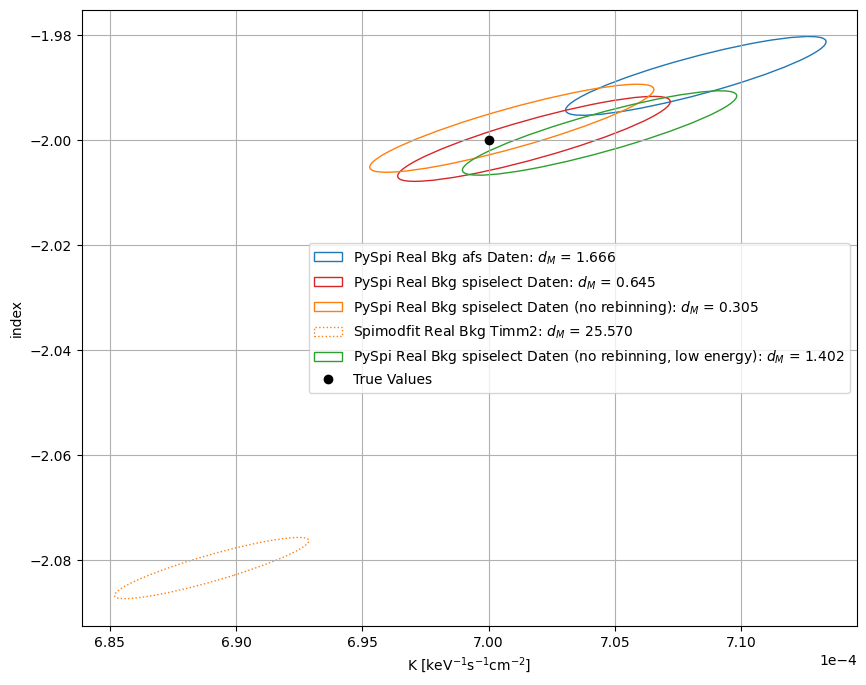

In [14]:
import math

fig, ax = plt.subplots(figsize=(10, 8))
for folder, name, edgecolor, linestyle in zip(folders, names, edgecolors, linestyles):
    with open(f"{folder}/source_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    confidence_ellipse(val, cov, ax, 1, edgecolor=edgecolor, label=name, ls=linestyle)
plt.plot(real_vals[0], real_vals[1], "ko", label="True Values")
ax.autoscale()
ax.grid()
#lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.legend()
plt.xlabel("K [keV$^{-1}$s$^{-1}$cm$^{-2}$]")
plt.ylabel("index")
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


In [5]:
#plt.savefig(f"{path}/spimodfit_comparison_combined_plot_Timm_v2.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
fig.savefig(f"{path}/spimodfit_comparison_Timm2_Crab_like.pdf", bbox_inches='tight')